In [1]:
import sys
!{sys.executable} -m pip install pytesseract
!{sys.executable} -m pip install matplotlib

In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# For configuration

In [3]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Users\HP\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [4]:
img=cv2.imread(r'C:\Users\HP\Desktop\OCR\Demo.png')

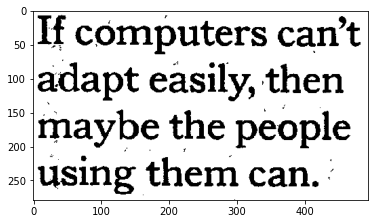

In [5]:
plt.imshow(img)

In [6]:
img2char= pytesseract.image_to_string(img)

In [7]:
print("Text form of data :","\n",img2char)

Text form of data : 
 If computers can’t
adapt easily, then
maybe the people
using them can. ’



In [8]:
imgbox=pytesseract.image_to_boxes(img)


In [9]:
print(imgbox)

I 7 228 29 271 0
f 27 219 49 272 0
c 62 225 121 264 0
o 107 214 141 271 0
m 123 228 177 256 0
p 168 214 196 271 0
u 179 214 211 271 0
t 213 226 246 256 0
e 247 226 268 263 0
r 269 226 294 255 0
s 297 225 345 255 0
c 361 225 387 254 0
a 389 216 417 254 0
n 419 226 451 254 0
’ 451 251 462 270 0
t 462 225 483 261 0
a 7 140 37 198 0
d 37 159 69 206 0
a 58 140 84 206 0
p 71 158 100 188 0
t 103 146 156 195 0
e 172 158 198 187 0
a 188 145 213 204 0
s 201 157 229 204 0
i 231 157 254 187 0
l 258 159 270 202 0
y 273 145 321 202 0
, 318 148 327 167 0
t 338 157 364 193 0
h 365 157 395 200 0
e 398 157 423 185 0
n 427 157 458 185 0
m 8 84 58 130 0
a 42 71 75 133 0
y 60 89 88 119 0
b 90 77 122 118 0
e 123 71 186 133 0
t 201 89 222 125 0
h 222 71 254 132 0
e 258 88 283 117 0
p 299 76 331 117 0
e 333 88 359 134 0
o 360 88 390 140 0
p 382 76 409 140 0
l 393 76 424 117 0
e 426 88 468 131 0
u 7 18 40 65 0
s 40 21 65 50 0
i 68 22 82 65 0
n 84 21 116 50 0
g 119 8 152 49 0
t 166 20 188 56 0
h 190 20 221 63 0

In [10]:
imgh,imgw,_=img.shape

In [11]:
img.shape

(279, 494, 3)

In [12]:
for boxes in imgbox.splitlines():
    boxes=boxes.split(" ")
    x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img, (x,imgh-y),(w, imgh-h) , (0,0,255),3)

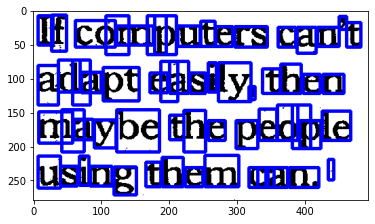

In [13]:
plt.imshow(img)

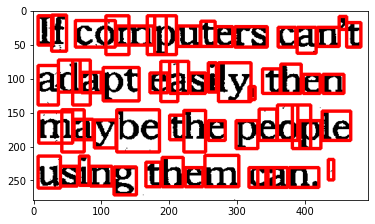

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [15]:

font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture(r"C:\Users\HP\Desktop\OCR\Final.mp4")
#cap.set(cv2.CAP_PROP_FPS,170)
#Check if the video is opened correctly , else display a message
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
cntr=0;
while True:
    ret,frame=cap.read()
    cntr=cntr+1
    if((cntr%20)==0):
        imgh,imgw,_=frame.shape
        x1,y1,w1,h1=0,0,imgh,imgw
        imgchar=pytesseract.image_to_string(frame)
        imgboxes=pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(" ")
            x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame,(x,imgh-y),(w,imgh-h),(0,0,255),3)

        cv2.putText(frame,imgchar,(x1+int(w1/50),y1+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
       
        
        cv2.imshow('Text Detection Tutorial', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()
            

# Web Camera

In [16]:

font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture(1)
#cap=cv2.VideoCapture(r"C:\Users\HP\Desktop\OCR\Final.mp4")
#cap.set(cv2.CAP_PROP_FPS,170)#
#Check if the webcam is opened correctly , else display a message
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Camera")
cntr=0;
while True:
    ret,frame=cap.read()
    cntr=cntr+1
    if((cntr%20)==0):
        imgh,imgw,_=frame.shape
        #eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_eye.xml')
        x1,y1,w1,h1=0,0,imgh,imgw
        imgchar=pytesseract.image_to_string(frame)
        imgboxes=pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(" ")
            x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame,(x,imgh-y),(w,imgh-h),(0,0,255),3)
        #cv2.rectangle(frame , (x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
            #Add text
        cv2.putText(frame,imgchar,(x1+int(w1/50),y1+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
        #font= cv2.FONT_HERSHEY.SIMPLEX
           
            
        #gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #print(faceCascade.empty())
        #faces=faceCascade.detectMultiScale(gray,1.1,4)
        
        #Draw a rectangle around the face
        #for(x,y,w,h) in  faces:
            #cv2.recatngle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            
        #Use putText() method for
        #inserting text on video
        
        cv2.imshow('Text Detection Tutorial', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()
            